MULTILINEAR REGRESSION FRAMEWORK FOR TRAIN/TEST

In [2]:
#Transformation 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [62]:
training = pd.read_csv('../../data/train_clean.csv', index_col=0)
testing = pd.read_csv('../../data/test_clean.csv', index_col=0)

In [63]:
testing.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageType', 'GarageArea', 'Kitchen',
       'Fireplace', 'ExterQ', 'BsmtQ', 'HeatingQ', 'n_toilets', 'n_showers'],
      dtype='object')

In [64]:
#Convert year building was built/remodeled into a numeric Age (training data set)
training['AgeBuilt'] = 2019 - training['YearBuilt']
training['AgeRemodel'] = 2019 - training['YearRemodAdd']

In [65]:
#Convert year building was built/remodeled into a numeric Age (testing data set)
testing['AgeBuilt'] = 2019 - testing['YearBuilt']
testing['AgeRemodel'] = 2019 - testing['YearRemodAdd']

In [95]:
#Normalization of 5 features: training
training['NormLot'] = (training.LotArea - training.LotArea.mean())/training.LotArea.std()
training['NormAgeBuilt'] = (training.AgeBuilt - training.AgeBuilt.mean())/training.AgeBuilt.std()
training['NormAgeRemodel'] = (training.AgeRemodel - training.AgeRemodel.mean())/training.AgeRemodel.std()
training['NormGrLivArea'] = (training.GrLivArea - training.GrLivArea.mean())/training.GrLivArea.std()
training['NormGarageArea'] = (training.GarageArea - training.GarageArea.mean())/training.GarageArea.std()
training['NormSalePrice'] = (training.SalePrice - training.SalePrice.mean())/training.SalePrice.std()

In [67]:
#Normalization of 5 features: testing
testing['NormLot'] = (testing.LotArea - testing.LotArea.mean())/testing.LotArea.std()
testing['NormAgeBuilt'] = (testing.AgeBuilt - testing.AgeBuilt.mean())/testing.AgeBuilt.std()
testing['NormAgeRemodel'] = (testing.AgeRemodel - testing.AgeRemodel.mean())/testing.AgeRemodel.std()
testing['NormGrLivArea'] = (testing.GrLivArea - testing.GrLivArea.mean())/testing.GrLivArea.std()
testing['NormGarageArea'] = (testing.GarageArea - testing.GarageArea.mean())/testing.GarageArea.std()
#testing['NormSalePrice'] = (testing.SalePrice - testing.SalePrice.mean())/testing.SalePrice.std()

In [96]:
#Training data // train_y could be SalePrice or NormSalePrice
x_list = ['NormLot','NormAgeBuilt','NormAgeRemodel','NormGrLivArea','BsmtFullBath','BedroomAbvGr','KitchenAbvGr',
         'GarageType','NormGarageArea','Kitchen','Fireplace','ExterQ','BsmtQ','HeatingQ','n_toilets','n_showers']
train_x = training[x_list]
train_y = training['NormSalePrice']  #You can use either SalePrice
                                        #or NormSalePrice
test_x = testing[x_list]

In [97]:
#Multilinear - Simple -- Unpenalized model i.e. lambda = 0
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(train_x, train_y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(train_x, train_y)))

Intercept: -2.069814
Coefficients: [ 0.11851697 -0.03723728 -0.01627426  0.45880504 -0.21986    -0.00745433
 -0.16752509 -0.07042929  0.1256408   0.18090248  0.04426596  0.34587918
  0.10674586  0.02225071 -0.02200591  0.06188633]
R^2: 0.833345


In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

LASSO REGRESSION / COEFFICIENT ESTIMATES AT DIFFERENT ALPHA LEVELS

In [111]:
lasso  = Lasso()
alphas = np.linspace(0.1,0.9,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
intercepts_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(train_x, train_y)  
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
        
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  
coefs_lasso.head(10)

,NormLot,NormAgeBuilt,NormAgeRemodel,NormGrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,NormGarageArea,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers
0.100000,0.027993,-0.043093,-0.054045,0.413449,-0.0,0.0,-0.0,-0.0,0.145461,0.084375,0.077706,0.117407,0.077008,0.009189,0.0,0.0
0.142105,0.000000,-0.049567,-0.067345,0.414068,-0.0,0.0,-0.0,-0.0,0.148598,0.043539,0.086135,0.010786,0.063789,0.001194,0.0,0.0
0.184211,0.000000,-0.047385,-0.065810,0.401016,-0.0,0.0,-0.0,-0.0,0.138143,0.000000,0.088863,0.000000,0.042168,0.000000,0.0,0.0
0.226316,0.000000,-0.041071,-0.050656,0.383622,0.0,0.0,-0.0,-0.0,0.122434,0.000000,0.089276,0.000000,0.016395,0.000000,0.0,0.0
0.268421,0.000000,-0.031421,-0.033926,0.364572,0.0,0.0,-0.0,-0.0,0.106676,0.000000,0.089307,0.000000,0.000000,0.000000,0.0,0.0
0.310526,0.000000,-0.016038,-0.014440,0.342662,0.0,0.0,-0.0,-0.0,0.090769,0.000000,0.088655,0.000000,0.000000,0.000000,0.0,0.0
0.352632,0.000000,-0.000000,-0.000000,0.319843,0.0,0.0,-0.0,-0.0,0.073748,0.000000,0.087983,0.000000,0.000000,0.000000,0.0,0.0
0.394737,0.000000,-0.000000,-0.000000,0.292593,0.0,0.0,-0.0,-0.0,0.045996,0.000000,0.086901,0.000000,0.000000,0.000000,0.0,0.0
0.436842,0.000000,-0.000000,-0.000000,0.265344,0.0,0.0,-0.0,-0.0,0.018245,0.000000,0.085819,0.000000,0.000000,0.000000,0.0,0.0
0.478947,0.000000,-0.000000,-0.000000,0.233838,0.0,0.0,-0.0,-0.0,0.000000,0.000000,0.084088,0.000000,0.000000,0.000000,0.0,0.0


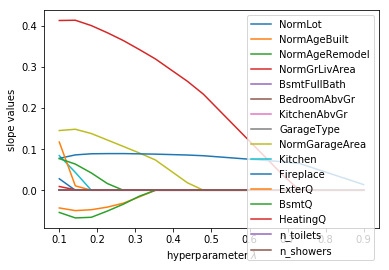

In [112]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

plt.legend()   

In [122]:
ridge = Ridge() # create a ridge regression instance
ridge.set_params(normalize=False)
ridge.fit(train_x, train_y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The coef of determination of ridge regression is: %.4f" %ridge.score(train_x, train_y))

The coef of determination of ridge regression is: 0.8333


In [150]:
ridge_scores_train = []
lasso_scores_train = []
#ridge_scores_test  = []
#lasso_scores_test  = []

alphas = np.logspace(-2, 3, 10)

for alpha in alphas:
    ridge.set_params(alpha=alpha, normalize=False)
    lasso.set_params(alpha=alpha, normalize=False)
    ridge.fit(train_x, train_y)
    lasso.fit(train_x, train_y)
    print(ridge.score(train_x,train_y))
    ridge_scores_train.append(ridge.score(train_x, train_y))
    #ridge_scores_test.append(ridge.score(X_test, Y_test))
    lasso_scores_train.append(lasso.score(train_x, train_y))
    #lasso_scores_test.append(lasso.score(X_test, Y_test))
    
ridge_scores_train = np.array(ridge_scores_train) 
#ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
#lasso_scores_test  = np.array(lasso_scores_test)

0.8333449290193717
0.8333449274658979
0.8333449074477044
0.8333446510005407
0.8333414325441014
0.8333036771513808
0.8329345600523276
0.8303093397045922
0.8177197567190041
0.780622357464946


array([0.83334493, 0.83334493, 0.83334491, 0.83334465, 0.83334143,
       0.83330368, 0.83293456, 0.83030934, 0.81771976, 0.78062236])

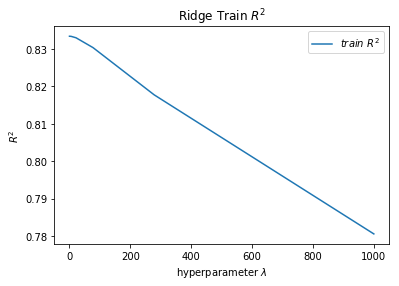

In [151]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train $R^2$')
#ridge_underfit = ridge_scores_train < ridge_scores_test
#last_underfit  = np.max(alphas[ridge_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
ridge_scores_train

Text(0,0.5,'$R^2$')

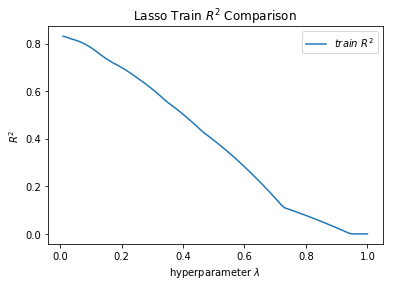

In [117]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train $R^2$ Comparison')
#lasso_underfit = lasso_scores_train < lasso_scores_test
#last_underfit  = np.max(alphas[lasso_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [143]:
lasso_scores_train

array([0.78345418, 0.75205883, 0.7231708 , 0.69954162, 0.67210427,
       0.641538  , 0.60861514, 0.57181886, 0.53692683, 0.50286325])

In [144]:
ridge_scores_train

array([0.83334492, 0.83334491, 0.83334489, 0.83334488, 0.83334486,
       0.83334484, 0.83334481, 0.83334479, 0.83334476, 0.83334472])